<a href="https://colab.research.google.com/github/kreshuklab/DL4MIA_Pre-course_Webinar/blob/main/notebooks/1_Intro_to_Image_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Manipulation Tutorial

We are going to work with Kaggle 2018 Data Science Bowl data.  
To start with go the [data webpage](https://www.kaggle.com/c/data-science-bowl-2018) and read the data description. To make it easier, we're going to work with a subset of it. 

In [ ]:
# run this in google colab to get the visuals used in the notebook
!wget https://github.com/kreshuklab/DL4MIA_Pre-course_Webinar/tree/main/images

## Downloading the data - Colab 
If you work with these notebooks using Colab or other environment, you can download data to any location, for example, in the current directory.

In [ ]:
import os

if os.getenv("COLAB_RELEASE_TAG"):
    data_dir = "./"
else:
    raise RuntimeError("Skip the entire section 'Downloading the data - Colab' since not running on Google Colab.")

Now let's download the data. You  can use the '!' character to enter command line prompts in the notebook.

In [ ]:
# Data download 
!wget https://raw.githubusercontent.com/AakashSudhakar/2018-data-science-bowl/master/compressed_files/stage1_train.zip -c

And please check whether the downloaded archive is around 80M (the value after the progress bar [ <=> ]). If the value is much smaller, rerun the previous cell - probably something failed. 

Those of you who like bash can play around with unzipping the data into nice folders. The rest of you can just run the following:


In [ ]:
!mkdir {data_dir}/nuclei_data && unzip -qq {data_dir}/stage1_train.zip -d {data_dir}/nuclei_data/ && rm {data_dir}/stage1_train.zip

## Check the data

Don't forget that you can always check what is happening in your directory using `ls` :

In [ ]:
!ls {data_dir}

In [ ]:
!ls {data_dir}/nuclei_data

Wow, that was a loooot of folders. Hint: you can clear the output of the cell by clicking the 'clear output' button below the 'run cell'.

Now let's check what they contain by taking one random folder name:




In [ ]:
!ls {data_dir}/nuclei_data/eb1df8ed879d04b36980b0958a0e8fc446ad08c0bdcf3b5f42e3db023187c7e5

In [ ]:
!ls {data_dir}/nuclei_data/eb1df8ed879d04b36980b0958a0e8fc446ad08c0bdcf3b5f42e3db023187c7e5/images

Okay, this one contains a png image. 

__TASK 1:__ Check other random folder names to make sure the structure is the same.

## Displaying images

Now we want to load some pictures and look at them. For this we would need the following libraries:

In [ ]:
# we want to show images directly in the notebook
%matplotlib inline
import os       # to list folders content
import numpy as np    # scientific computing 
import matplotlib.pyplot as plt   # plotting and visualisation
import scipy
import skimage    # image processing library, works with images as numpy arrays
import skimage.feature
import skimage.filters
import skimage.io
import skimage.morphology
import skimage.transform
plt.rcParams['figure.figsize'] = [12, 8]  # set default figure size for matplotlib plots

### Let's talk about how a computer sees images. 

As shown in the cat image below for a computer an image is represented as one large 3-dimensional array of numbers. In this example, the cat image is 248 pixels wide, 400 pixels tall, and has three color channels Red,Green,Blue (RGB). Therefore if we inspected the shape of the cat image it would be 400 x 248 x 3 (HWC). The dtype of the image determines what range of values the pixles can take, for example if the cat image has dtype=uint8 then each pixel will have a sinlge integer value in the range 0 (black) to 255 (white).


<img src="../images/Cat_image.png" width="600" height="400">

Now let's take a look at the Kaggle data

In [ ]:
# Let's load a random image 
image_path = os.path.join(data_dir, 'nuclei_data/eb1df8ed879d04b36980b0958a0e8fc446ad08c0bdcf3b5f42e3db023187c7e5/images/eb1df8ed879d04b36980b0958a0e8fc446ad08c0bdcf3b5f42e3db023187c7e5.png')
image = skimage.io.imread(image_path)

In [ ]:
# Since images are read as numpy arrays, we can check their shape and data type numpy-style
print(image.shape) # note that this is an RGBA image (has 4 channels)
print(image.dtype)

In [ ]:
# Now let's visualize the image
plt.imshow(image)
plt.show()

**TASK 2**: How many pixels wide is the Kaggle image?
## Plotting and Visualization

### Colormap

Read more about colormaps [here] (https://matplotlib.org/stable/tutorials/colors/colormaps.html)

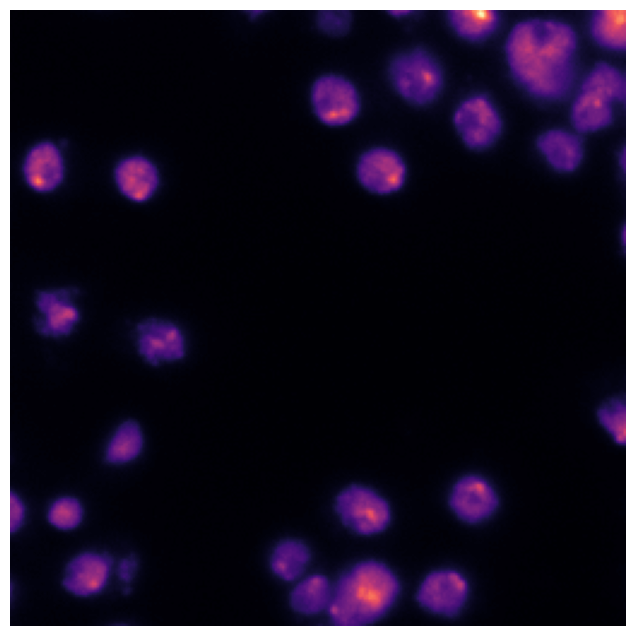

In [ ]:
plt.imshow(image[...,0], cmap="magma")  #Note that we are only showing the first channel of the image
plt.axis("off")
plt.show()

**TASK 2**: How many pixels wide is the Kaggle image?
## Plotting and Visualization

### Colormap

Read more about colormaps [here] (https://matplotlib.org/stable/tutorials/colors/colormaps.html)

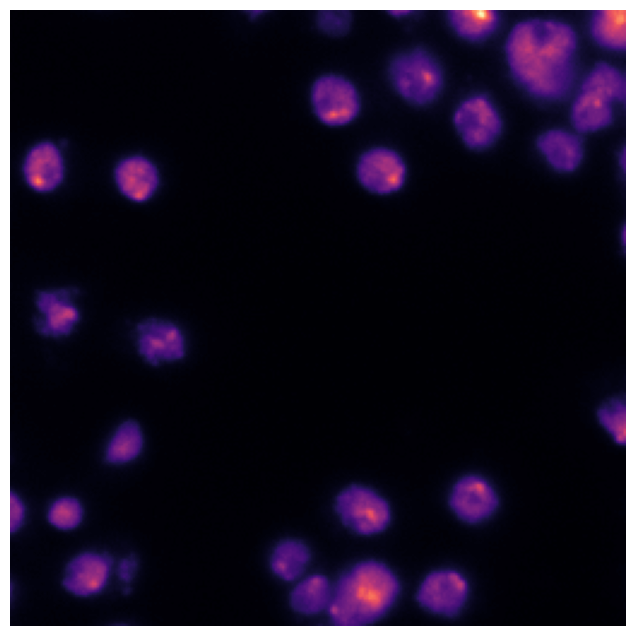

In [ ]:
plt.imshow(image[...,0], cmap="magma")  #Note that we are only showing the first channel of the image
plt.axis("off")
plt.show()

### Colorbar
Let's have a reference of the intenstiy values as a colorbar

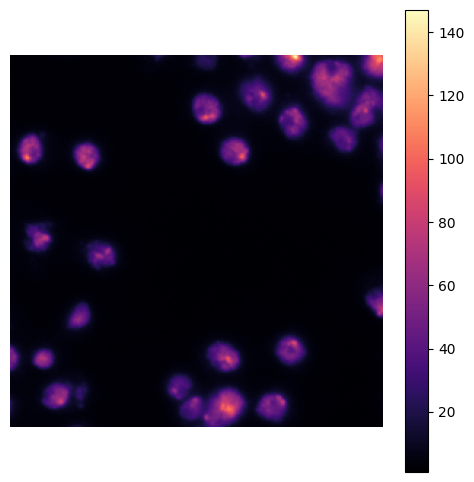

In [ ]:
plt.figure(figsize=(6, 6))
plt.imshow(image[...,0], cmap="magma")
plt.colorbar()
plt.axis("off")
plt.show()

### Plotting Histograms

> -  Let's see the histogram of the intensity values
> -  <code>image</code> is a 8-bit image, so the intensity values range from 0 to 255

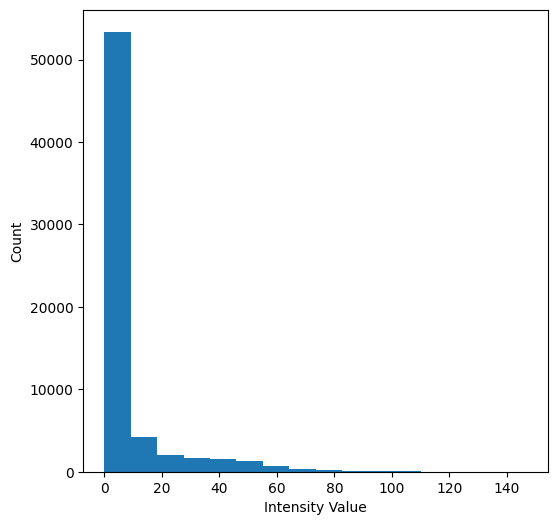

In [ ]:
plt.figure(figsize=(6, 6))
#bins indicate how may unique buclets you might want to put your values in and range is the min and max values in the image 
#Try different values for bins and range to see how the histogram changes
plt.hist(image[...,0].ravel(), bins=16, range=(0.0, image[...,0].max()))
plt.xlabel("Intensity Value")
plt.ylabel("Count")
plt.show()

Often (like in this case) we need to deal with multidimensional images, here we have an image that have 4 different z-slices (**stack**).

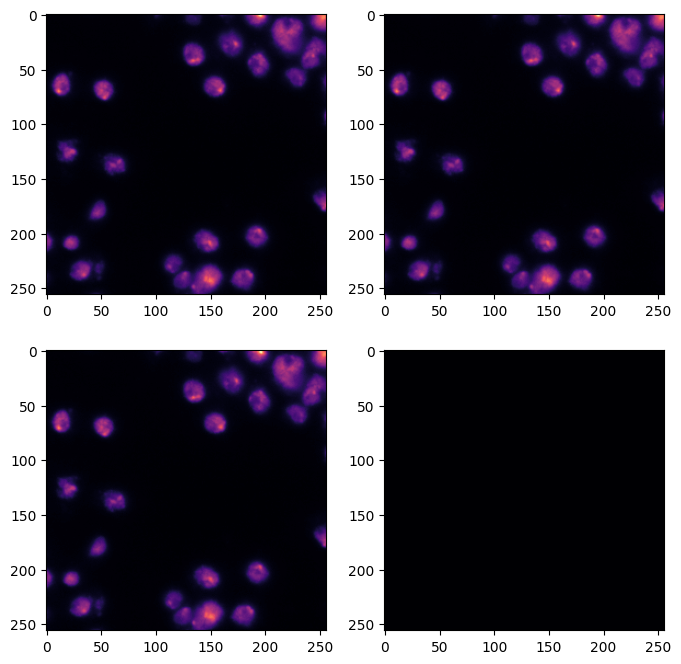

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(8, 8))
ax[0, 0].imshow(image[...,0], cmap="magma")
ax[0, 1].imshow(image[...,1], cmap="magma")
ax[1, 0].imshow(image[...,2], cmap="magma")
ax[1, 1].imshow(image[...,3], cmap="magma")

Here is a more complicated function to plot images. Since we have a list of images, we would like to be able to compare them side by side.

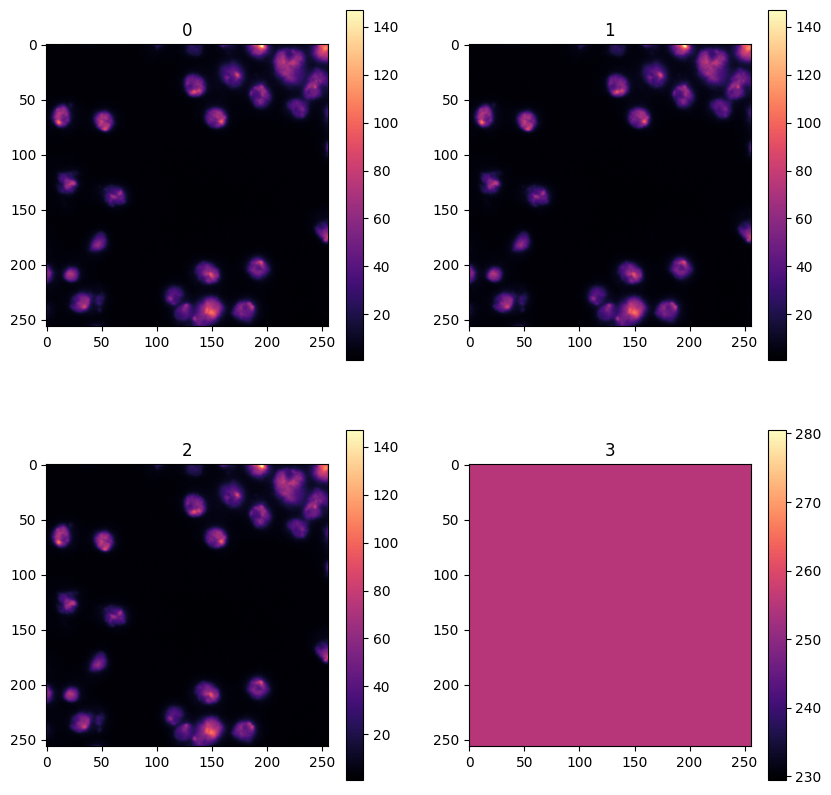

In [ ]:
def plot_images_list(images, titles=None, max_value=255):
    '''
    Plot a list of images.

            Parameters:
                    images (list): List of 2D numpy arrays
                    titles (list): List of string used as titles for the subplots
                    max_value (float): Maximum amplitude of the Gaussian.
    '''
    
    # some flexible parameters to adapt the number of rows/cols and size
    root = np.sqrt(images.shape[-1]).astype(int)
    size = 50 / root  # arbitrary

    # if no title was given
    if titles is None:
        titles = [i for i in range(images.shape[-1])]
    
    # create subplots
    fig, axs = plt.subplots(root, root, figsize=(10, 10))
    
    # now we populate the subplots with images
    for i, ax in enumerate(axs.flatten()):
        
        if i < images.shape[-1]:
            # show image
            ax.imshow(images[...,i], vmin=0, vmax=max_value, cmap="magma")            
            # add title
            ax.set_title(titles[i])
            #colorbar
            plt.colorbar(ax.imshow(images[...,i], cmap="magma"), ax=ax)
        else:
            # in case the number of suplots is larger than the number of elements in images
            ax.remove()
    plt.show()

# use plot_images_list to plot multiple images
plot_images_list(image)

**TASK 2**: How many pixels wide is the Kaggle image?
## Plotting and Visualization

### Colormap

Read more about colormaps [here] (https://matplotlib.org/stable/tutorials/colors/colormaps.html)

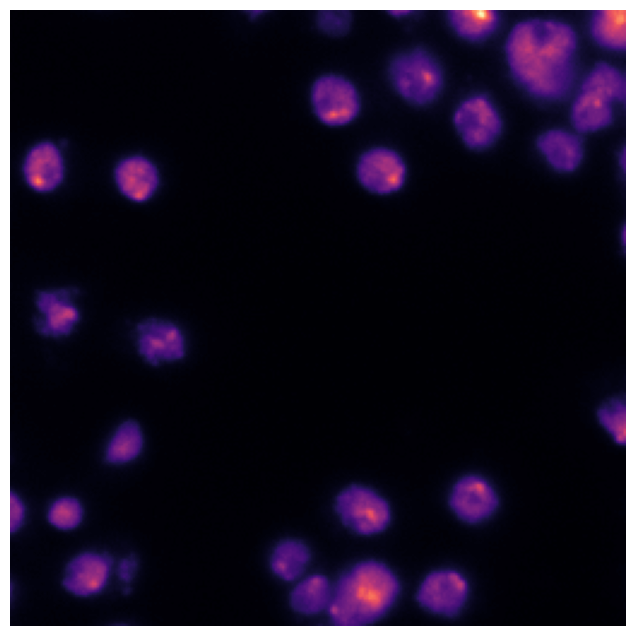

In [ ]:
plt.imshow(image[...,0], cmap="magma")  #Note that we are only showing the first channel of the image
plt.axis("off")
plt.show()

### Colorbar
Let's have a reference of the intenstiy values as a colorbar

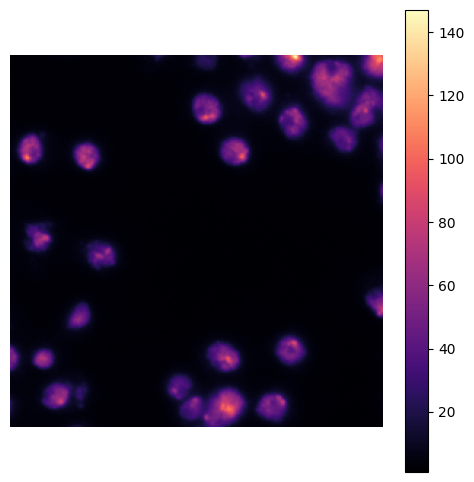

In [ ]:
plt.figure(figsize=(6, 6))
plt.imshow(image[...,0], cmap="magma")
plt.colorbar()
plt.axis("off")
plt.show()

### Plotting Histograms

> -  Let's see the histogram of the intensity values
> -  <code>image</code> is a 8-bit image, so the intensity values range from 0 to 255

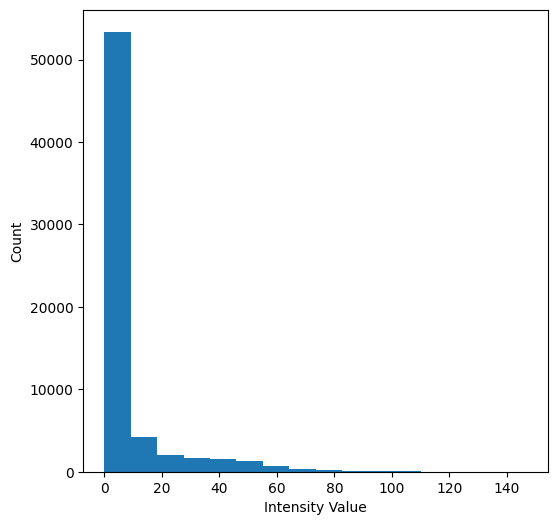

In [ ]:
plt.figure(figsize=(6, 6))
#bins indicate how may unique buclets you might want to put your values in and range is the min and max values in the image 
#Try different values for bins and range to see how the histogram changes
plt.hist(image[...,0].ravel(), bins=16, range=(0.0, image[...,0].max()))
plt.xlabel("Intensity Value")
plt.ylabel("Count")
plt.show()

Often (like in this case) we need to deal with multidimensional images, here we have an image that have 4 different z-slices (**stack**).

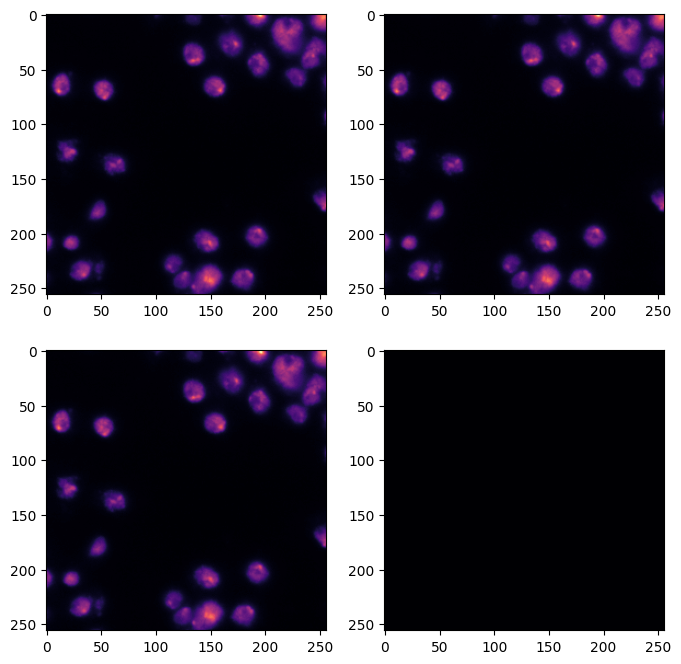

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(8, 8))
ax[0, 0].imshow(image[...,0], cmap="magma")
ax[0, 1].imshow(image[...,1], cmap="magma")
ax[1, 0].imshow(image[...,2], cmap="magma")
ax[1, 1].imshow(image[...,3], cmap="magma")

Here is a more complicated function to plot images. Since we have a list of images, we would like to be able to compare them side by side.

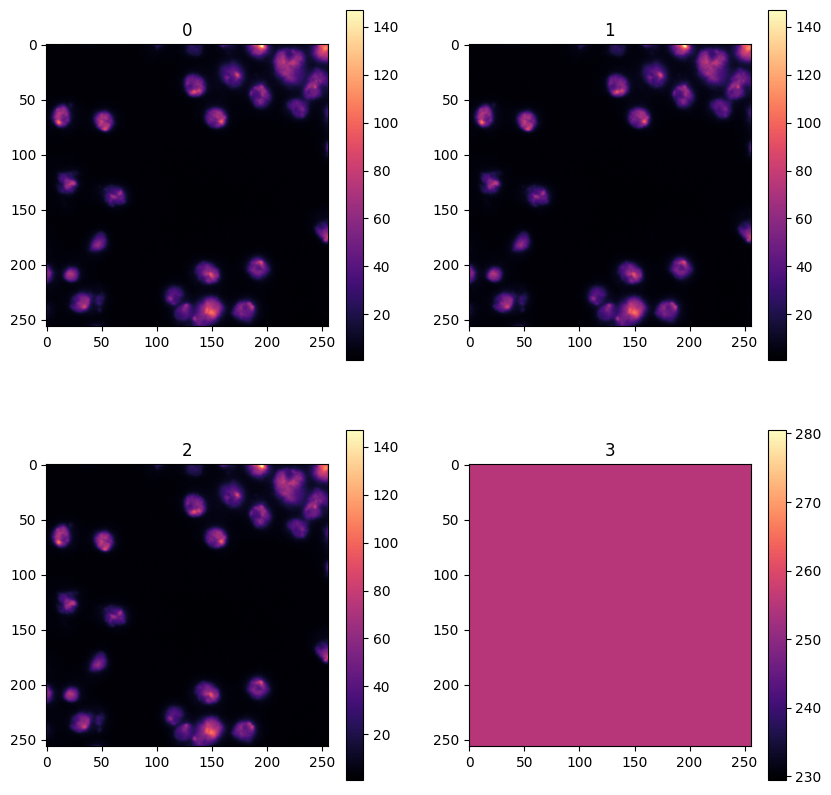

In [ ]:
def plot_images_list(images, titles=None, max_value=255):
    '''
    Plot a list of images.

            Parameters:
                    images (list): List of 2D numpy arrays
                    titles (list): List of string used as titles for the subplots
                    max_value (float): Maximum amplitude of the Gaussian.
    '''
    
    # some flexible parameters to adapt the number of rows/cols and size
    root = np.sqrt(images.shape[-1]).astype(int)
    size = 50 / root  # arbitrary

    # if no title was given
    if titles is None:
        titles = [i for i in range(images.shape[-1])]
    
    # create subplots
    fig, axs = plt.subplots(root, root, figsize=(10, 10))
    
    # now we populate the subplots with images
    for i, ax in enumerate(axs.flatten()):
        
        if i < images.shape[-1]:
            # show image
            ax.imshow(images[...,i], vmin=0, vmax=max_value, cmap="magma")            
            # add title
            ax.set_title(titles[i])
            #colorbar
            plt.colorbar(ax.imshow(images[...,i], cmap="magma"), ax=ax)
        else:
            # in case the number of suplots is larger than the number of elements in images
            ax.remove()
    plt.show()

# use plot_images_list to plot multiple images
plot_images_list(image)

**TASK 2**: How many pixels wide is the Kaggle image?
    What is the maximum possible pixel value?

You can check your answers using the following code. Did you get what you expect and can you explain it?

In [ ]:
print(f"Max pixel value: {image.max()}")
print(f"Min pixel value: {image.min()}")

If we want to have a better overview of what is happening in the folder, loading the images one by one is not the best approach. What we will do now is list all the folders we have, and write a function that will load an image file from a random folder.

In [ ]:
nuclei_data_path = os.path.join(data_dir, 'nuclei_data')
folders_list = os.listdir(nuclei_data_path)  # get the list of all the folders inside nuclei_data
print(folders_list[0])   # let's see how the folder names look like

In [ ]:
!ls {data_dir}/nuclei_data/{folders_list[0]}

__TASK 3:__ What would be the image path in the show_random_image function?

In [ ]:
def show_random_image(dir_list):
  rand_idx = np.random.randint(0, len(dir_list))   # get a random index
  img_name = dir_list[rand_idx] 
  # Your code here
  img_path = ...
  random_image = skimage.io.imread(img_path)
  plt.imshow(random_image)
  plt.show()

In [ ]:
# Now test your function and see how the images in your folder look like
show_random_image(folders_list)

## Operations on images

What can we do with our images? Imagine you have a photo of a teddy bear in front of you. You can **flip**, **rotate**, and **crop** the image. Since images are also data arrays of numerical values, we can also change the **brightness** or **contrast** , or add **noise**. In our deep learning practice, we can use these tricks to provide variants of images to the network. 

<img src="../images/image_transformation.png" width="800" height="700">

Reference: [Shervine Amidi's vlog](https://stanford.edu/~shervine/teaching/cs-230/cheatsheet-deep-learning-tips-and-tricks)

Now let's look more into the operations that you can perform on your image. Firstly, let's write a function that visualises two images at the same time to examine the transformations visually.

In [ ]:
def show_two_images(image1, image2):
    f, axarr = plt.subplots(1, 2)   # we need two images in a row
    axarr[0].imshow(image1)
    axarr[1].imshow(image2)
    _ = [ax.axis('off') for ax in axarr]   # remove the axis ticks
    plt.show()

In [ ]:
# Now let's crop the upper left corner of the image and visualize it next to the original image
show_two_images(image, image[:100, :100])

Looks fine. Now let's go through some common image transformations.

## Converting to greyscale
If you have looked through enough random images from the folder, you might have noticed some of them are colored and some are gray-scale. If we want to build a generic pipeline that processes all of them, we might need to convert the coloured ones to grayscale as well. Also, we will invert the image to have 0 as background and 1 as signal

In [ ]:
grey_image = skimage.color.rgb2gray(skimage.color.rgba2rgb(image))
print(grey_image.shape) # now we see that 4 channels are gone
grey_image = 1 - grey_image
show_two_images(image, grey_image)

As you can see from the second image, by default matplotlib is using 'viridis' colormap to display grayscale images. 

**TASK 4**: change the cmap parameter in `imshow` function to display the second image in greyscale (use 'Greys' colormap)

## Rescaling image

In [ ]:
rescaled_image = skimage.transform.rescale(grey_image, scale=2, order=0)
print(rescaled_image.shape) # the image now is twice larger 
plt.imshow(rescaled_image, cmap='Greys')
plt.show()

**TASK 5** : try different interpolation orders. Which orders produce smoother images? 

Hint: for visualization crop small regions of the image to see more subtle differences (e.g. `show_two_images(img1[:100, :100], img2[:100, :100])`) 

**TASK 6** : find an skimage function that does the same, but instead of scale factor accepts output shape as a parameter 

Advanced **TASK 7**: modify `show_two_images` to show n images - given a list of any number of images the function should plot all of them in a row. Visualise multiple interpolations orders at the same time.

## Flipping image

In [ ]:
flipped_image = np.flip(image, axis=0)
show_two_images(image, flipped_image)

## Rotating image 

**TASK 8**: use `skimage.transform.rotate` to rotate your image and visualise it


**TASK 9**: write a function that given an image and a number N will rotate the image by a random angle in range (0, N) degrees

In [ ]:
# Your code here
rotated_image = #  Your code here
show_two_images(image, rotated_image)


## Thresholding image
In simple cases you can get an object mask (segment your object) using plain thresholding + connected components. Let's see how good it works for our images. Note, that here we will work on the greyscale version

In [ ]:
threshold = 0.5
thresholded_image = grey_image > threshold 
cells_labels = skimage.measure.label(thresholded_image)
plt.imshow(cells_labels, cmap='nipy_spectral')
plt.show()

**TASK 10** : try different thresholds. Do you manage to get the objects properly separated? 

Let's plot a histogram of image values to see whether there is a good cutoff between background and objects

In [ ]:
plt.hist(grey_image.flatten(), bins=100)
plt.show()

Doesn't loook like we can define a clear threshold here. Let's try more sophisticated methods

**TASK 11** : Smooth the image with Gaussian filter (`skimage.filters.gaussian`) and try different thresholds again. Does it look better?

In [ ]:
gaussian_smoothed_image = skimage.filters.gaussian(grey_image)
show_two_images(image, gaussian_smoothed_image)

The object boundaries look smoother, but there are still many objects we are not able to split fully. 

**TASK 12** : take a look at other thresholding methods offered by skimage. Hint: many of them can be visualized with `skimage.filters.try_all_threshold`



## Morphological Transformations
The masks we got out of tresholding look suboptimal. There are small objects and some masks are merged together. We can try to alleviate there problems with such morphological transformation as opening - errosion followed by dilation (a good explanation [here](https://www.youtube.com/watch?v=uUweXBmm978)).

Let's see how it looks like.

In [ ]:
# we need to set a structuring element (https://www.youtube.com/watch?v=9lqH5XLI-V4)
kernel = np.ones((3,3), np.uint8)
opened_image = scipy.ndimage.binary_opening(thresholded_image, structure=kernel, iterations=4)
show_two_images(thresholded_image, opened_image)


As we can see, many small object disappeared and some objects got split, but not all.

**TASK 13**: try different number of iterations. How does it affect the segmentation masks? 

**TASK 14**: Try closing (`scipy.ndimage.binary_closing`) to see what it does.

## Finding edges 
We can also try to use image gradients to detect object edges. Let's try to use the [Canny algorithm](https://scikit-image.org/docs/dev/auto_examples/applications/plot_coins_segmentation.html#edge-based-segmentation). 

In [ ]:
canny_edges = skimage.feature.canny(grey_image, sigma=1) # we get the object boundaries - 'edges'
filled_edges = scipy.ndimage.binary_fill_holes(canny_edges) # we fill the inner part to get full objects
show_two_images(canny_edges, filled_edges)

While the boundaries seem relatively good, the resulting segmentation is far from perfect, because of the small holes in the boundaries. 

**TASK 15** : for the Canny detecton try different `sigma`, `low_threshold` and `high_threshold`. Does any combination give good object segmentation?

**Advanced TASK 16**: segment the image with the watershed algorithm as described in the "Segment nuclei" part of the [Segment human cells tutorial](https://scikit-image.org/docs/dev/auto_examples/applications/plot_human_mitosis.html#segment-nuclei).

#### If you want to learn more about the canny algorithm...

We first need to cover how image convolution work and will do so in the next notebook. We recommend looking at that part first. If your brain is still itchy, this person explains really well how an edge detection works! 

1) [Basic of edge detection](https://www.youtube.com/watch?v=uihBwtPIBxM)
2) [Canny edge detector](https://www.youtube.com/watch?v=sRFM5IEqR2w)